In [189]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [148]:
# def Init_cond(x):
#     """ x : a scalar value """
   

#     if x<500.0 and x>=400.0:
#         return 2.0
#     elif x>=500. and x<=600.:
#         return 1.0
#     else:
#         return 0.0
    

In [200]:
def initi_cond(x):
    """
    Function to Initialize the value of advection based on the input value of x.
    params:
        x: a scalar value.
          """
    if x>=400 and x<500.0:
        return 2.0
    elif x>=500. and x<600:
        return 1.0
    else:
        return 0.0
    

In [201]:
u=-0.4
dt=0.1
dx=0.25
alpha=0.1
beta=0.6
c=u*dt/dx
Nt=2000
Nx=1000

X=np.arange(0,Nx+dx,dx)

In [202]:
phi_n_minus_one=list(map(initi_cond,X))
# d=np.array(phi_n_minus_one)
phi_n=np.array(phi_n_minus_one)[:]

In [204]:
def Plotter(X,phi_prev,color=None):
    data=phi_prev
    if color is not None:
        plt.plot(X,data,color=color)
        plt.title(r'$\frac{\partial \phi}{\partial t}=u\frac{\partial \phi}{\partial x}$')
        plt.xlabel('x-axis')
        plt.ylabel(r'$\phi(x,t)$')
        plt.grid('on')
        plt.ion()
      
    else:
        plt.plot(X,data)
        plt.title(r'$\frac{\partial \phi}{\partial t}=-u\frac{\partial \phi}{\partial x}$')
        plt.xlabel('x-axis')
        plt.ylabel(r'$\phi(x,t)$')
        plt.grid('on')
        plt.ion()
        
        

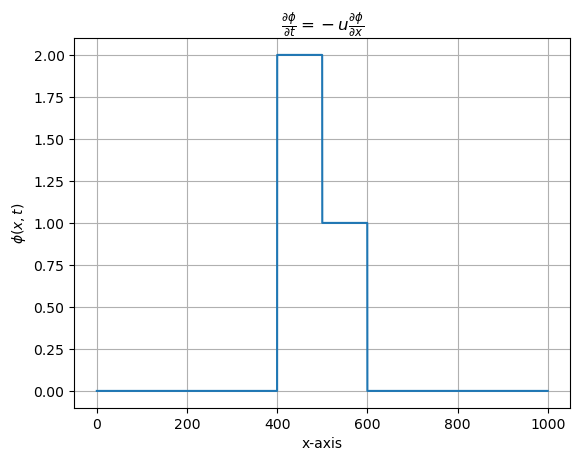

In [205]:
Plotter(X,phi_n_minus_one)
plt.show()

In [206]:
def CTCS(phi_n_minus_one, phi_n,c):
    
    return phi_n_minus_one-c*(np.roll(phi_n,1)-np.roll(phi_n,-1))

In [207]:
def UpdateForward(phi,c):
    if type(phi)==list:
        phi=np.array(phi)
    return (1-c)*phi+c*np.roll(phi,1)

# RAW Filter

0.0
500.0000000000452
1000.0000000001588
1500.0999999997312


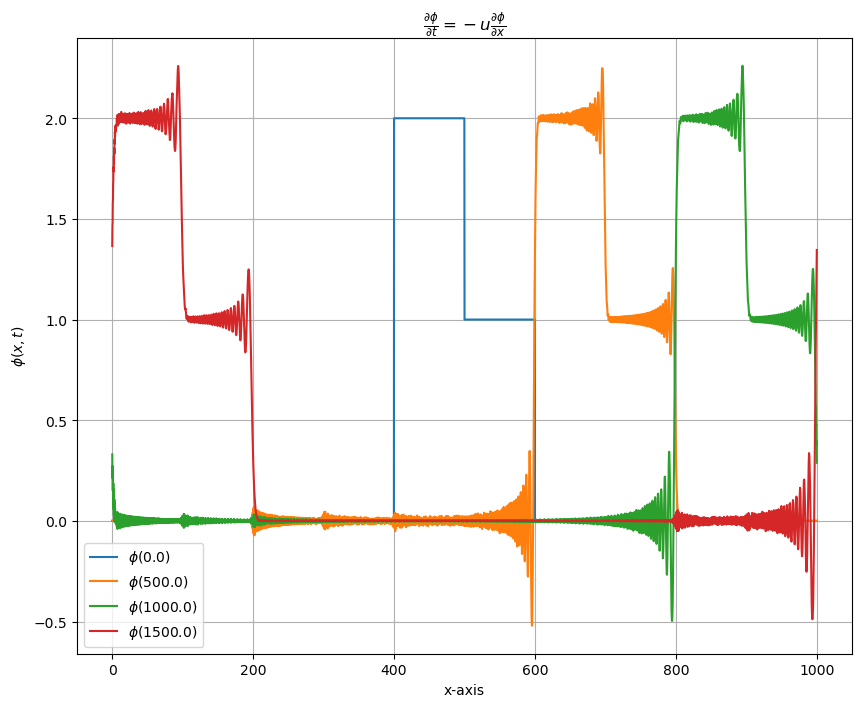

In [208]:
t=0.0
plt.figure(figsize=(10,8))
# if u<0:
#     phi_curr=UpdateForward(phi_prev,c)

while t<=2000.:

#compute phi(n+1) using leapfrog method

    phi_n_plus_one=CTCS(phi_n_minus_one,phi_n,c)


    if t%500<dt:
        print(t)
        Plotter(X,phi_n,color=None)
        
    d=alpha*(phi_n_minus_one-2.*phi_n+phi_n_plus_one)
    
    phi_n_minus_one[:]=phi_n+beta*d
    
    phi_n[:]=phi_n_plus_one+(beta-1)*d
    t=t+dt
plt.legend([r'$\phi(0.0)$',r'$\phi(500.0)$',r'$\phi(1000.0)$',r'$\phi(1500.0)$',r'$\phi(2000.0)$'])
plt.show()

    


# RA Filter

In [209]:
phi_n_minus_one=list(map(initi_cond,X))
# d=np.array(phi_n_minus_one)
phi_n=np.array(phi_n_minus_one)[:]

0.0
500.0000000000452
1000.0000000001588
1500.0999999997312


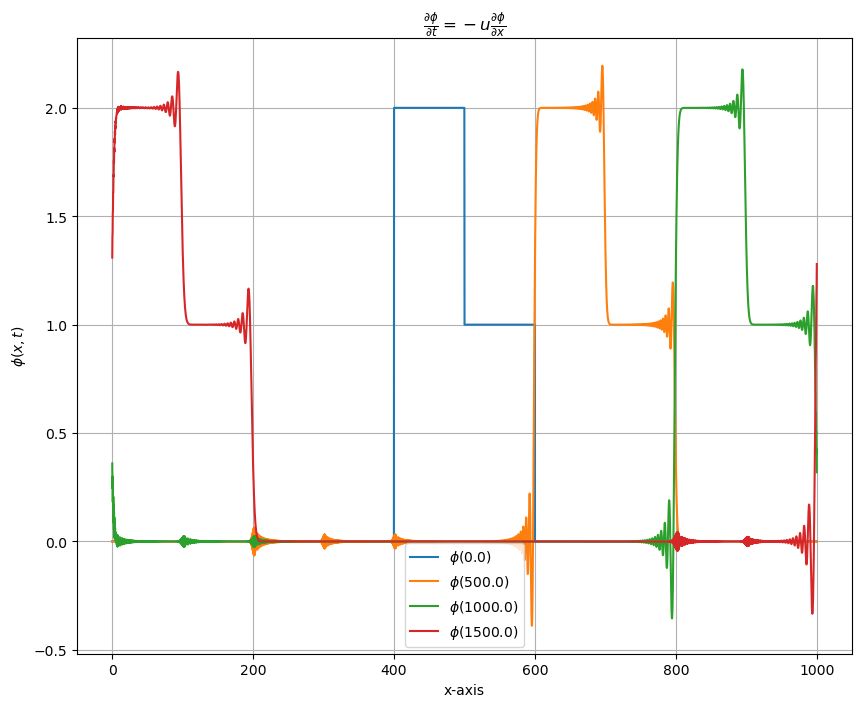

In [210]:
t=0.0
plt.figure(figsize=(10,8))
# if u<0:
#     phi_curr=UpdateForward(phi_prev,c)

while t<=2000.:

#compute phi(n+1) using leapfrog method

    phi_n_plus_one=CTCS(phi_n_minus_one,phi_n,c)


    if t%500<dt:
        print(t)
        Plotter(X,phi_n,color=None)
        
    d=alpha*(phi_n_minus_one-2.*phi_n+phi_n_plus_one)
    
    phi_n_minus_one[:]=phi_n+d
    
    phi_n[:]=phi_n_plus_one
    t=t+dt
plt.legend([r'$\phi(0.0)$',r'$\phi(500.0)$',r'$\phi(1000.0)$',r'$\phi(1500.0)$',r'$\phi(2000.0)$'])
plt.show()


# Using forward difference

In [214]:
phi_n_minus_one=list(map(initi_cond,X))
# d=np.array(phi_n_minus_one)
phi_n=np.array(phi_n_minus_one)[:]

0.0
500.0000000000452
1000.0000000001588
1500.0999999997312


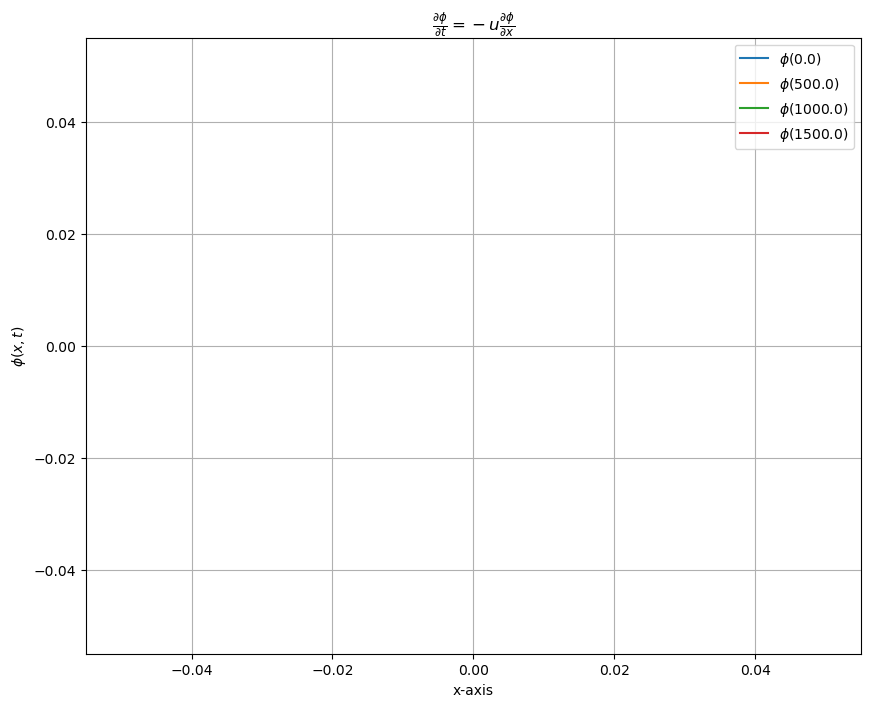

In [216]:
t=0.0
plt.figure(figsize=(10,8))
# if u<0:
#     phi_curr=UpdateForward(phi_prev,c)

while t<2000.:

#compute phi(n+1) using Forward finite difference

    phi_n_plus_one=UpdateForward(phi_n,c)


    if t%500<dt:
        print(t)
        Plotter(X,phi_n,color=None)
        
    d=alpha*(phi_n_minus_one-2.*phi_n+phi_n_plus_one)
    
    phi_n_minus_one[:]=phi_n+beta*d
    
    phi_n[:]=phi_n_plus_one+(beta-1)*d
    t=t+dt
plt.legend([r'$\phi(0.0)$',r'$\phi(500.0)$',r'$\phi(1000.0)$',r'$\phi(1500.0)$',r'$\phi(2000.0)$'])
plt.show()
